In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import galport
import agama

In [7]:
# Load potential

pot_gal = agama.Potential(file='../data/Pot_non_CylSpline_t400.ini')
pot_gal_sym = agama.Potential(file='../data/Pot_axi_CylSpline_t400.ini')

Omega = np.load('../data/omega_p.npy')[400*8]

In [ ]:
def make_H_mesh(hamiltionian):
    ntheta = 1001
    nJ = 801
    theta = np.linspace(-np.pi,np.pi,ntheta)
    J = np.linspace(0.0,0.8,nJ)
    
    X, Y = np.meshgrid(theta, J)
    
    x_sh = X.reshape(ntheta*nJ)
    y_sh = Y.reshape(ntheta*nJ)
    q = np.zeros((ntheta*nJ, 3))
    q[:,0] = x_sh
    q[:,2] = y_sh
    
    H_sh = hamiltionian(y_sh, x_sh)
    x_stack = np.vstack((y_sh, x_sh))
    dot = hamiltionian.derivative(y_sh, x_sh)
    H = H_sh.reshape((nJ, ntheta))
    dot_J = dot[0].reshape((nJ, ntheta))
    dot_theta = dot[1].reshape((nJ, ntheta))

    return X, Y, H, dot_J, dot_theta

def plot_phase_portrate(hamiltionian, x_data, Hone):

    X, Y, H, dot_J, dot_theta = make_H_mesh(hamiltionian)
    
    J_data = np.reshape(x_data[:,:,1], len(x_data[:,:,1])*len(x_data[0,:,1]))
    phi_data = np.reshape(x_data[:,:,3], len(x_data[:,:,3])*len(x_data[0,:,3]))
    H_data = hamiltionian.hamiltonian(J_data, phi_data)
    H_data_tab = np.reshape(H_data, (len(x_data[:,:,3]),len(x_data[0,:,3])))
    H_levels = np.nanmean(H_data_tab, axis=1)

    fig, ax = plt.subplots(figsize=(12, 7))
    
    levels = np.sort(H_levels)
    CS = ax.contour(X, Y, H, levels=levels, colors='black')
    CS = ax.contour(X, Y, dot_theta, levels=[0], colors='blue')
    CS = ax.contour(X, Y, dot_J, levels=[0], colors='green')
    
    ax.scatter((x_data[:,:,3]+np.pi)%(2*np.pi)-np.pi, x_data[:,:,1], s=1, linewidth=0)
    ax.set_xlabel("$\\theta_z - \\theta_R$", fontsize=60)
    ax.set_ylabel("$J_z$", fontsize=60)
    ax.tick_params(labelsize=30)
    
    ax.set_ylim([0,np.nanmax(J_data)*1.05])
    ax.set_xlim([-np.pi,np.pi])
    
    plt.show()
    plt.close()

In [10]:
HJ = -1.8

HF =galport.HFitting(potential=pot_gal, axisym_potential=pot_gal_sym, Omega=Omega)
H_vilr = HF.fit(H=HJ, Htype='buckling')
plot_phase_portrate(H_vilr, HF.phasecoord, HJ)

994 orbits complete (105.7 orbits/s)
994 orbits complete (103.5 orbits/s)
998 orbits complete (96.96 orbits/s)
1000 orbits complete (97.19 orbits/s)
10 orbits complete (44.05 orbits/s)


1989 orbits complete (106.4 orbits/s)
1989 orbits complete (103.5 orbits/s)
1995 orbits complete (95.06 orbits/s)
2000 orbits complete (95.45 orbits/s)
20 orbits complete (74.35 orbits/s)


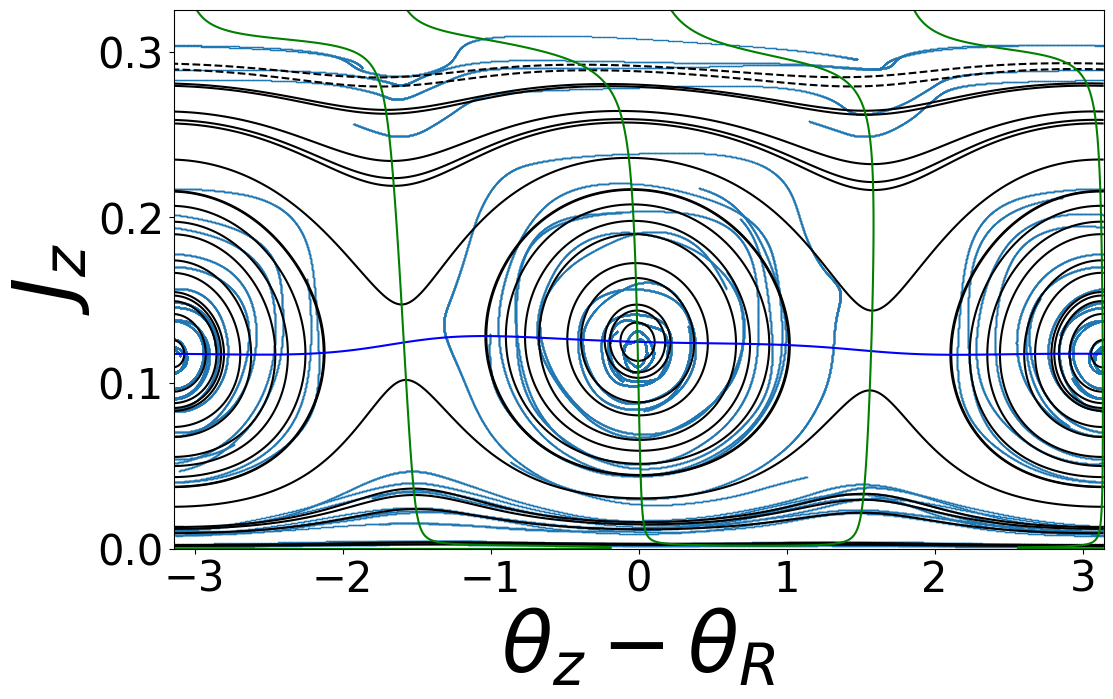

In [21]:
HJ = -1.8

Norb = 20
n = [0, 1, 2, 3, -1, -2, -3]
deg = 4
Tint = 200
Nint = 20000

HF =galport.HFitting(potential=pot_gal, axisym_potential=pot_gal_sym, Omega=Omega)
H_vilr = HF.fit(H=HJ, Htype='buckling', Norb=Norb, Tint=Tint, Nint=Nint,
                n=n, deg=deg, weight_dphidt=1.)

plot_phase_portrate(H_vilr, HF.phasecoord, HJ)